In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv("titanic_train.csv")
test=pd.read_csv("titanic_test.csv")
test2=pd.read_csv("titanic_test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<AxesSubplot:>

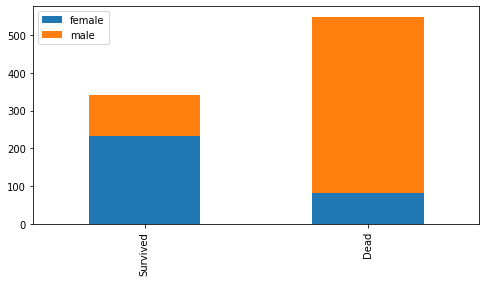

In [5]:
survived = train[train["Survived"]==1]["Sex"].value_counts()
dead = train[train["Survived"]==0]["Sex"].value_counts()
df_sex = pd.DataFrame([survived,dead])
df_sex.index = ["Survived","Dead"]
df_sex.plot(kind="bar",stacked = True, figsize = (8,4))

In [6]:
combined_data = [train,test]

for data in combined_data:
    data["Prefix"] = data["Name"].str.extract(' ([A-Za-z]+)\.', expand = False)

In [7]:
train["Prefix"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Lady          1
Countess      1
Jonkheer      1
Mme           1
Sir           1
Ms            1
Don           1
Capt          1
Name: Prefix, dtype: int64

In [8]:
Prefix_mapping = {"Mr":0,"Miss":1,"Mrs":2,"Master":0,"Dr":3,"Rev":3,"Major":3,"Mlle":1,"Col":3,"Capt":3,"Sir":3,"Ms":1,"Lady":3,"Mme":2,"Countess":3,"Jonkheer":3,"Don":3}

In [9]:
for data in combined_data:
    data["Prefix"] = data["Prefix"].map(Prefix_mapping)

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [11]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2.0


In [12]:
test["Prefix"] = test["Prefix"].fillna(3)
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Prefix
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.576555
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.822423
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,3.000000


In [13]:
for data in combined_data:
    data.drop(columns = "Name",inplace=True)

In [14]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [15]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2.0


<AxesSubplot:>

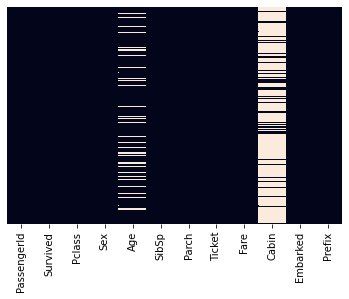

In [16]:
import seaborn as sns

sns.heatmap(train.isnull(), yticklabels = False, cbar = False)

In [17]:
train["Cabin"].isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

In [18]:
train["Cabin"] = train["Cabin"].fillna(0)
for i in range(891):
    if(train.at[i,"Cabin"]!=0):
        train.at[i,"Cabin"]=1
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,0,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,1,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,1,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,0,S,0


<AxesSubplot:xlabel='Survived', ylabel='count'>

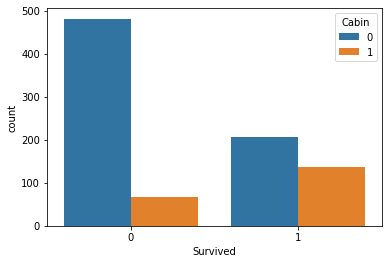

In [19]:
sns.countplot(x = "Survived", hue = "Cabin", data= train)

<AxesSubplot:>

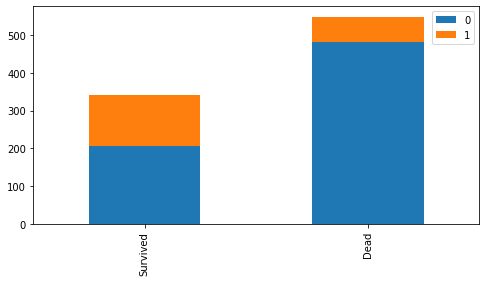

In [20]:
survived = train[train["Survived"]==1]["Cabin"].value_counts()
dead = train[train["Survived"]==0]["Cabin"].value_counts()
df_cabin = pd.DataFrame([survived,dead])
df_cabin.index = ["Survived","Dead"]
df_cabin.plot(kind="bar",stacked = True, figsize = (8,4))

In [21]:
test["Cabin"] = test["Cabin"].fillna(0)
for i in range(417):
    if(test.at[i,"Cabin"]!=0):
        test.at[i,"Cabin"]=1


In [22]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,892,3,male,34.5,0,0,330911,7.8292,0,Q,0.0
1,893,3,female,47.0,1,0,363272,7.0000,0,S,2.0
2,894,2,male,62.0,0,0,240276,9.6875,0,Q,0.0
3,895,3,male,27.0,0,0,315154,8.6625,0,S,0.0
4,896,3,female,22.0,1,1,3101298,12.2875,0,S,2.0


<AxesSubplot:xlabel='Survived', ylabel='count'>

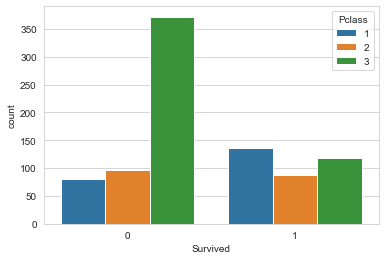

In [23]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived", hue = "Pclass", data = train)

<AxesSubplot:>

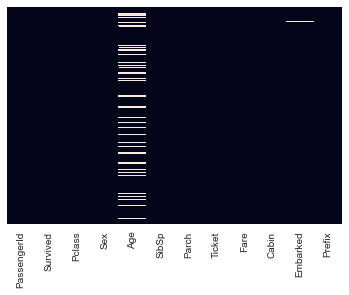

In [24]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

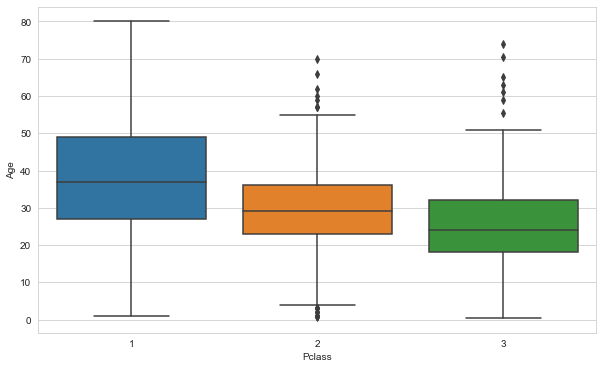

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Pclass",y="Age",data=train)

In [26]:
avg_first = train["Age"][train["Pclass"]==1].mean()
avg_second = train["Age"][train["Pclass"]==2].mean()
avg_third = train["Age"][train["Pclass"]==3].mean()
print("Average age for First class Passenger : ",avg_first)
print("Average age for Second class Passenger : ",avg_second)
print("Average age for Third class Passenger : ",avg_third)

Average age for First class Passenger :  38.233440860215055
Average age for Second class Passenger :  29.87763005780347
Average age for Third class Passenger :  25.14061971830986


In [27]:
for data in combined_data:
    data["Age"] = data["Age"].fillna(0)
    
for i in range(891):
    if(train.at[i,"Age"]==0):
        if(train.at[i,"Pclass"]==1):
            train.at[i,"Age"]=avg_first
        elif(train.at[i,"Pclass"]==2):
            train.at[i,"Age"]=avg_second
        else:
            train.at[i,"Age"]=avg_third
for i in range(418):
    if(test.at[i,"Age"]==0):
        if(test.at[i,"Pclass"]==1):
            test.at[i,"Age"]=avg_first
        elif(test.at[i,"Pclass"]==2):
            test.at[i,"Age"]=avg_second
        else:
            test.at[i,"Age"]=avg_third

In [28]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Prefix
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.292875,0.523008,0.381594,32.204208,0.567901
std,257.353842,0.486592,0.836071,13.210527,1.102743,0.806057,49.693429,0.826963
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [29]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Prefix
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,29.555296,0.447368,0.392344,35.627188,0.576555
std,120.810458,0.841838,12.846509,0.896760,0.981429,55.907576,0.822423
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,25.140620,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,36.375000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,3.000000


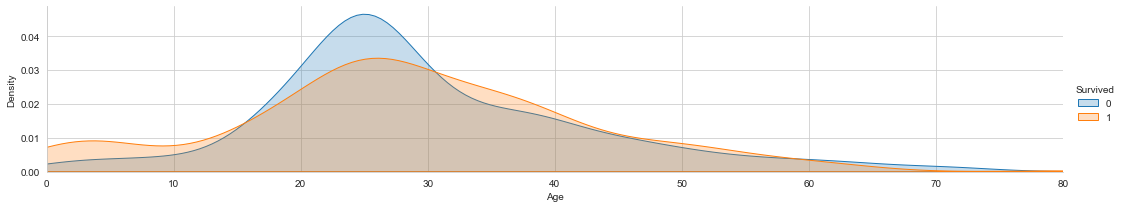

In [30]:
fac = sns.FacetGrid(train,hue = "Survived", aspect = 5)
fac.map(sns.kdeplot,'Age',shade=True)
fac.set(xlim=(0,train["Age"].max()))
fac.add_legend()


(0.0, 20.0)

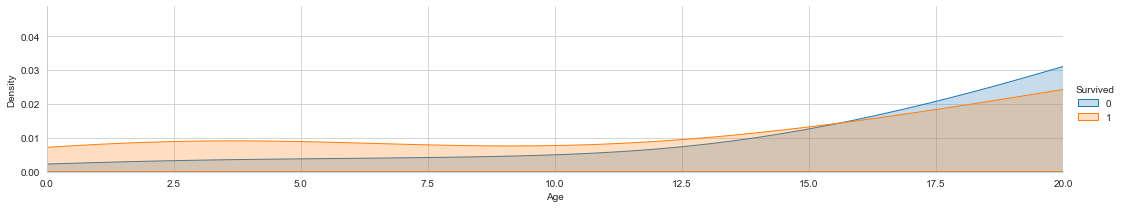

In [31]:
fac = sns.FacetGrid(train,hue = "Survived", aspect = 5)
fac.map(sns.kdeplot,'Age',shade=True)
fac.set(xlim=(0,train["Age"].max()))
fac.add_legend()
plt.xlim(0,20)

(20.0, 30.0)

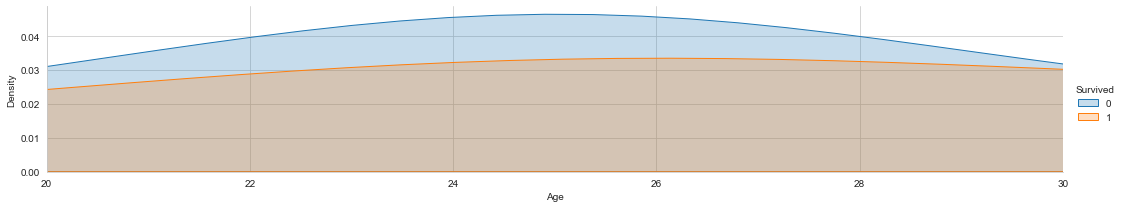

In [32]:
fac = sns.FacetGrid(train,hue = "Survived", aspect = 5)
fac.map(sns.kdeplot,'Age',shade=True)
fac.set(xlim=(0,train["Age"].max()))
fac.add_legend()
plt.xlim(20,30)

(30.0, 75.0)

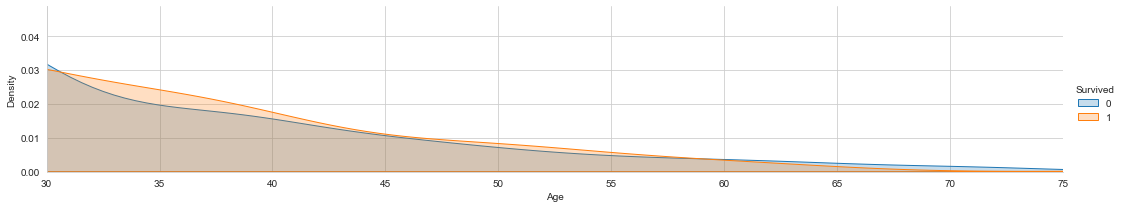

In [33]:
fac = sns.FacetGrid(train,hue = "Survived", aspect = 5)
fac.map(sns.kdeplot,'Age',shade=True)
fac.set(xlim=(0,train["Age"].max()))
fac.add_legend()
plt.xlim(30,75)

<AxesSubplot:>

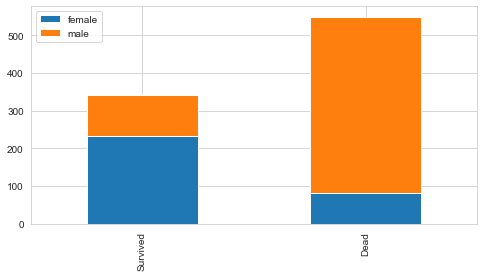

In [34]:
survived = train[train["Survived"]==1]["Sex"].value_counts()
dead = train[train["Survived"]==0]["Sex"].value_counts()
df_sex = pd.DataFrame([survived,dead])
df_sex.index = ["Survived","Dead"]
df_sex.plot(kind="bar",stacked = True, figsize = (8,4))

In [35]:
dummy = pd.get_dummies(train["Sex"])
dummy.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [36]:
train["Sex"] = dummy["female"]
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,0,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,1,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,1,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,0,S,0


In [37]:
dummy2 = pd.get_dummies(test["Sex"])
test["Sex"] = dummy2["female"]
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,892,3,0,34.5,0,0,330911,7.8292,0,Q,0.0
1,893,3,1,47.0,1,0,363272,7.0000,0,S,2.0
2,894,2,0,62.0,0,0,240276,9.6875,0,Q,0.0
3,895,3,0,27.0,0,0,315154,8.6625,0,S,0.0
4,896,3,1,22.0,1,1,3101298,12.2875,0,S,2.0


In [38]:
emb_dummies = pd.get_dummies(train["Embarked"])
emb_dummies.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [39]:
train["Q"] = emb_dummies["Q"]
train["S"] = emb_dummies["S"]
train.drop(columns="Embarked",inplace = True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Prefix,Q,S
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,0,0,0,1
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,1,2,0,0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,1
3,4,1,1,1,35.0,1,0,113803,53.1000,1,2,0,1
4,5,0,3,0,35.0,0,0,373450,8.0500,0,0,0,1


In [40]:
emb_dumm = pd.get_dummies(test["Embarked"])
test["Q"] = emb_dumm["Q"]
test["S"] = emb_dumm["S"]
test.drop(columns="Embarked",inplace = True)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Prefix,Q,S
0,892,3,0,34.5,0,0,330911,7.8292,0,0.0,1,0
1,893,3,1,47.0,1,0,363272,7.0000,0,2.0,0,1
2,894,2,0,62.0,0,0,240276,9.6875,0,0.0,1,0
3,895,3,0,27.0,0,0,315154,8.6625,0,0.0,0,1
4,896,3,1,22.0,1,1,3101298,12.2875,0,2.0,0,1


In [41]:
train.drop(columns = "PassengerId", inplace = True)
test.drop(columns = "PassengerId", inplace = True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Prefix,Q,S
0,0,3,0,22.0,1,0,A/5 21171,7.2500,0,0,0,1
1,1,1,1,38.0,1,0,PC 17599,71.2833,1,2,0,0
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,1
3,1,1,1,35.0,1,0,113803,53.1000,1,2,0,1
4,0,3,0,35.0,0,0,373450,8.0500,0,0,0,1


In [42]:
train.drop(columns = "Ticket", inplace = True)
test.drop(columns = "Ticket", inplace = True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Prefix,Q,S
0,0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,2,0,0
2,1,3,1,26.0,0,0,7.9250,0,1,0,1
3,1,1,1,35.0,1,0,53.1000,1,2,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,0,1


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

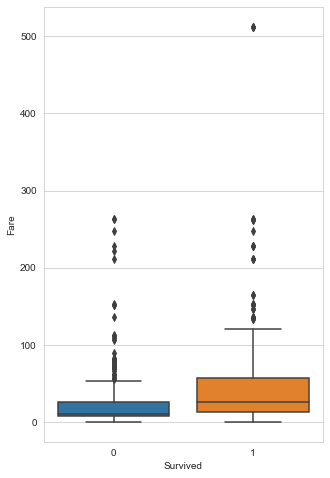

In [43]:
plt.figure(figsize=(5,8))
sns.boxplot(x="Survived",y="Fare",data=train)

In [44]:
train["Fare"].isnull().value_counts()

False    891
Name: Fare, dtype: int64

In [45]:
test["Fare"].isnull().value_counts()

False    417
True       1
Name: Fare, dtype: int64

In [46]:
fare_first = train["Fare"][train["Pclass"]==1].mean()
fare_second = train["Fare"][train["Pclass"]==2].mean()
fare_third = train["Fare"][train["Pclass"]==3].mean()
print("Average Fare for First class Passenger : ",fare_first)
print("Average Fare for Second class Passenger : ",fare_second)
print("Average Fare for Third class Passenger : ",fare_third)

Average Fare for First class Passenger :  84.1546875
Average Fare for Second class Passenger :  20.662183152173913
Average Fare for Third class Passenger :  13.675550101832993


In [47]:
test["Fare"] = test["Fare"].fillna(0)

for i in range(418):
    if(test.at[i,"Fare"]==0):
        if(test.at[i,"Pclass"]==1):
            test.at[i,"Fare"]=fare_first
        elif(test.at[i,"Pclass"]==2):
            test.at[i,"Fare"]=fare_second
        else:
            test.at[i,"Fare"]=fare_third
            
test["Fare"].isnull().value_counts()

False    418
Name: Fare, dtype: int64

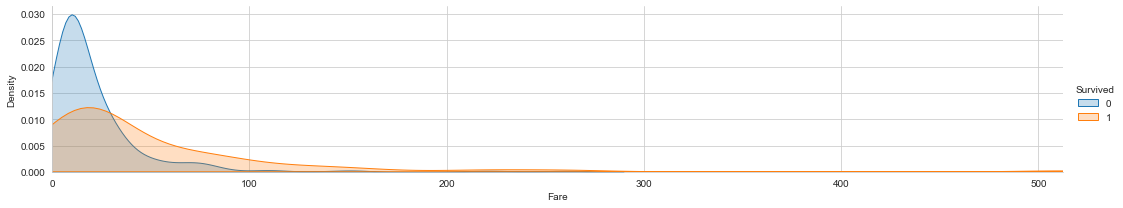

In [48]:
fac = sns.FacetGrid(train,hue = "Survived", aspect = 5)
fac.map(sns.kdeplot,'Fare',shade=True)
fac.set(xlim=(0,train["Fare"].max()))
fac.add_legend()


(0.0, 100.0)

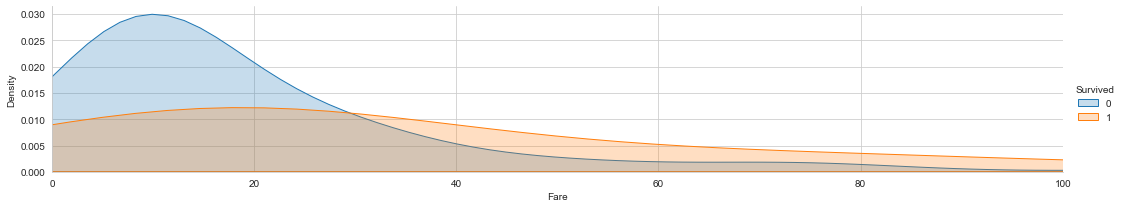

In [49]:
fac = sns.FacetGrid(train,hue = "Survived", aspect = 5)
fac.map(sns.kdeplot,'Fare',shade=True)
fac.set(xlim=(0,train["Fare"].max()))
fac.add_legend()
plt.xlim(0,100)

In [50]:
train["Family"] = train["SibSp"] + train["Parch"] + 1
test["Family"] = test["SibSp"] + test["Parch"] + 1

for data in combined_data:
    data.drop(columns = ["SibSp","Parch"],inplace =True)
    
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Prefix,Q,S,Family
0,0,3,0,22.0,7.2500,0,0,0,1,2
1,1,1,1,38.0,71.2833,1,2,0,0,2
2,1,3,1,26.0,7.9250,0,1,0,1,1
3,1,1,1,35.0,53.1000,1,2,0,1,2
4,0,3,0,35.0,8.0500,0,0,0,1,1


In [51]:
test.head()

,Pclass,Sex,Age,Fare,Cabin,Prefix,Q,S,Family
0,3,0,34.5,7.8292,0,0.0,1,0,1
1,3,1,47.0,7.0000,0,2.0,0,1,2
2,2,0,62.0,9.6875,0,0.0,1,0,1
3,3,0,27.0,8.6625,0,0.0,0,1,1
4,3,1,22.0,12.2875,0,2.0,0,1,3


<AxesSubplot:xlabel='Survived', ylabel='count'>

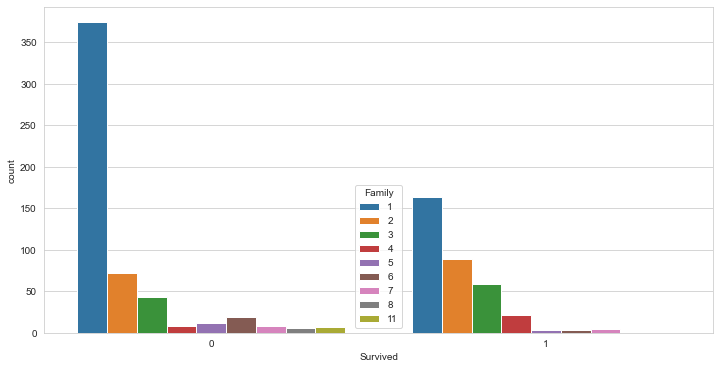

In [52]:
plt.figure(figsize = (12,6))
sns.set_style("whitegrid")
sns.countplot(x = "Survived", hue = "Family", data = train)

In [53]:
X = train[["Pclass","Sex","Age","Fare","Cabin","Prefix","Q","S","Family"]]
Y = train["Survived"]
X_TEST = test[["Pclass","Sex","Age","Fare","Cabin","Prefix","Q","S","Family"]]

In [54]:
print(X)

     Pclass  Sex       Age     Fare Cabin  Prefix  Q  S  Family
0         3    0  22.00000   7.2500     0       0  0  1       2
1         1    1  38.00000  71.2833     1       2  0  0       2
2         3    1  26.00000   7.9250     0       1  0  1       1
3         1    1  35.00000  53.1000     1       2  0  1       2
4         3    0  35.00000   8.0500     0       0  0  1       1
..      ...  ...       ...      ...   ...     ... .. ..     ...
886       2    0  27.00000  13.0000     0       3  0  1       1
887       1    1  19.00000  30.0000     1       1  0  1       1
888       3    1  25.14062  23.4500     0       1  0  1       4
889       1    0  26.00000  30.0000     1       0  0  0       1
890       3    0  32.00000   7.7500     0       0  1  0       1

[891 rows x 9 columns]


In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X_TEST =  sc.transform(X_TEST)
X

array([[ 0.82737724, -0.73769513, -0.55236029, ..., -0.30756234,
         0.61930636,  0.05915988],
       [-1.56610693,  1.35557354,  0.65947522, ..., -0.30756234,
        -1.61470971,  0.05915988],
       [ 0.82737724,  1.35557354, -0.24940141, ..., -0.30756234,
         0.61930636, -0.56097483],
       ...,
       [ 0.82737724,  1.35557354, -0.31449064, ..., -0.30756234,
         0.61930636,  1.29942929],
       [-1.56610693, -0.73769513, -0.24940141, ..., -0.30756234,
        -1.61470971, -0.56097483],
       [ 0.82737724, -0.73769513,  0.20503691, ...,  3.25137334,
        -1.61470971, -0.56097483]])

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state=1)

In [57]:
# 1. K- Nearest neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acc = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    yhat = knn.predict(X_test)
    acc.append(accuracy_score(y_test,yhat))
    print("For k = ",i," : ",accuracy_score(y_test,yhat))


For k =  1  :  0.7206703910614525
For k =  2  :  0.7486033519553073
For k =  3  :  0.776536312849162
For k =  4  :  0.7597765363128491
For k =  5  :  0.7430167597765364
For k =  6  :  0.7374301675977654
For k =  7  :  0.7541899441340782
For k =  8  :  0.776536312849162
For k =  9  :  0.7932960893854749
For k =  10  :  0.776536312849162
For k =  11  :  0.7821229050279329
For k =  12  :  0.7877094972067039
For k =  13  :  0.7877094972067039
For k =  14  :  0.7877094972067039
For k =  15  :  0.7877094972067039
For k =  16  :  0.770949720670391
For k =  17  :  0.7821229050279329
For k =  18  :  0.770949720670391
For k =  19  :  0.770949720670391


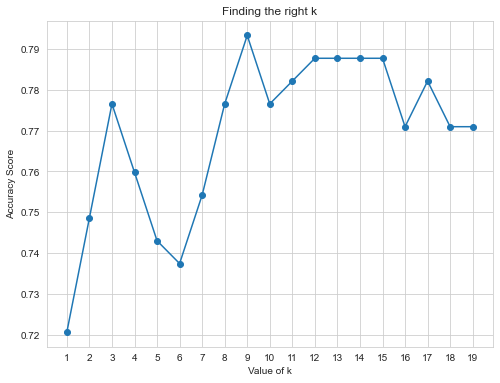

In [58]:
plt.figure(figsize=(8,6))
plt.plot(range(1,20),acc, marker = "o")
plt.xlabel("Value of k")
plt.ylabel("Accuracy Score")
plt.title("Finding the right k")
plt.xticks(range(1,20))
plt.show()

In [59]:
KNN = KNeighborsClassifier(n_neighbors = 9)
KNN.fit(X,Y)
y_pred = KNN.predict(X_TEST)

In [60]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [61]:
df_KNN = pd.DataFrame()
df_KNN["PassengerId"] = test2["PassengerId"]
df_KNN["Survived"] = y_pred
df_KNN.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [62]:
KNN_accuracy = 0.77272

In [63]:
# 2. decision tree algorithm
from sklearn.tree import DecisionTreeClassifier

depth = [];

for i in range(1,8):
    clf_tree = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = i)
    clf_tree.fit(X_train,y_train)
    yhat = clf_tree.predict(X_test)
    depth.append(accuracy_score(y_test,yhat))
    print("For max depth = ",i, " : ",accuracy_score(y_test,yhat))

For max depth =  1  :  0.776536312849162
For max depth =  2  :  0.7206703910614525
For max depth =  3  :  0.8044692737430168
For max depth =  4  :  0.7877094972067039
For max depth =  5  :  0.7653631284916201
For max depth =  6  :  0.7653631284916201
For max depth =  7  :  0.6983240223463687


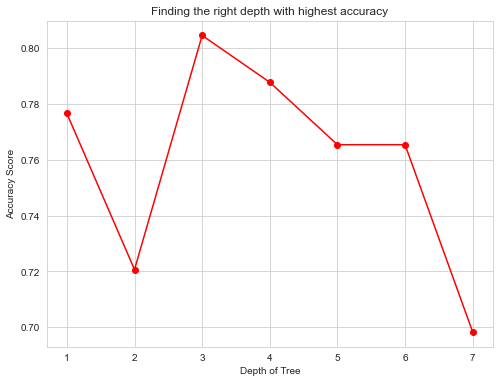

In [64]:
plt.figure(figsize=(8,6))
plt.plot(range(1,8),depth,color="red", marker = "o")
plt.xlabel("Depth of Tree")
plt.ylabel("Accuracy Score")
plt.title("Finding the right depth with highest accuracy")
plt.xticks(range(1,8))
plt.show()

In [65]:
clf_tr = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = 3)
clf_tr.fit(X,Y)
pred_tree = clf_tr.predict(X_TEST)
print(pred_tree)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [66]:
df_TREE = pd.DataFrame()
df_TREE["PassengerId"] = test2["PassengerId"]
df_TREE["Survived"] = pred_tree
df_TREE.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [67]:
TREE_accuracy = 0.78468

In [68]:
# 3. Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier

clf_forest = RandomForestClassifier(random_state=0)
clf_forest.fit(X_train,y_train)
yhat = clf_forest.predict(X_test)
print("Accuracy for training data : ",accuracy_score(y_test,yhat))

Accuracy for training data :  0.7653631284916201


In [69]:
clf_for = RandomForestClassifier(random_state=0)
clf_for.fit(X,Y)
y_forest = clf_for.predict(X_TEST)
y_forest

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [70]:
df_FOREST = pd.DataFrame()
df_FOREST["PassengerId"] = test2["PassengerId"]
df_FOREST["Survived"] = y_forest
df_FOREST.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [71]:
FOREST_accuracy = 0.77272

In [72]:
# 4. Support vector machine
from sklearn.svm import SVC
clf_svm = SVC(gamma='auto')
clf_svm.fit(X_train,y_train)
yhat = clf_svm.predict(X_test)
print("Accuracy for training data : ",accuracy_score(y_test,yhat))

Accuracy for training data :  0.7877094972067039


In [73]:
clf_SVM = SVC(gamma='auto')
clf_SVM.fit(X,Y)
pred_svm = clf_SVM.predict(X_TEST)
pred_svm

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [74]:
df_SVM = pd.DataFrame()
df_SVM["PassengerId"] = test2["PassengerId"]
df_SVM["Survived"] = pred_svm
df_SVM.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [75]:
SVM_accuracy = 0.77511

In [76]:
# 5. Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB.fit(X_train,y_train)
y_hat = clf_NB.predict(X_test)
print("Accuracy for training data : ",accuracy_score(y_test,y_hat))

Accuracy for training data :  0.7430167597765364


In [77]:
clf_NB = GaussianNB()
clf_NB.fit(X,Y)
pred_NB = clf_NB.predict(X_TEST)
pred_NB

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [78]:
df_NB = pd.DataFrame()
df_NB["PassengerId"] = test2["PassengerId"]
df_NB["Survived"] = pred_NB
df_NB.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [79]:
NB_accuracy = 0.72727

In [80]:
# 6. Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression(solver='liblinear', random_state=1)
regr.fit(X_train,y_train)
yhat = regr.predict(X_test)
print("Accuracy for training data : ",accuracy_score(y_test,y_hat))

Accuracy for training data :  0.7430167597765364


In [81]:
reg = LogisticRegression(solver='liblinear', random_state=1)
reg.fit(X,Y)
y_LR = reg.predict(X_TEST)

In [82]:
y_LR

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [83]:
df_LR = pd.DataFrame()
df_LR["PassengerId"] = test2["PassengerId"]
df_LR["Survived"] = y_LR
df_LR.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [84]:
LR_accuracy = 0.76555

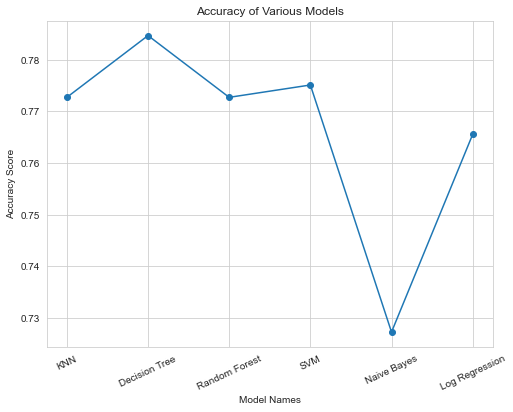

In [85]:
plt.figure(figsize=(8,6))
plt.plot(range(1,7),[KNN_accuracy,TREE_accuracy,FOREST_accuracy,SVM_accuracy,NB_accuracy,LR_accuracy],marker='o')
plt.xticks(range(1,7),['KNN','Decision Tree','Random Forest','SVM','Naive Bayes','Log Regression'],rotation=25)
plt.title('Accuracy of Various Models')
plt.xlabel('Model Names')
plt.ylabel("Accuracy Score")
plt.show()